In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_df=pd.read_csv("../week_06/diabetes.csv")

In [5]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis =1)
y = diabetes_df['Outcome']

#Stratification can be but isn't always helpful
#It tried to split the test data into groups that represent
#the data well instead of randomly selecting from the full
#data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

#Standardize 
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

X_train

array([[-0.85135507, -0.98013068, -0.40478372, ..., -0.60767846,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.16144422,  0.46536842, ..., -0.30213902,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.50447447, -0.62232176, ...,  0.3725939 ,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.75815778,  0.03029235, ...,  0.77997981,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.31421198,  0.03029235, ..., -0.56948603,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.73223168, -0.62232176, ..., -0.31486983,
        -0.57700104,  0.30730824]], shape=(614, 8))

In [8]:
# simplest logisitc regression appraoch
regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [9]:
regression.score(X_test,y_test)

0.7142857142857143

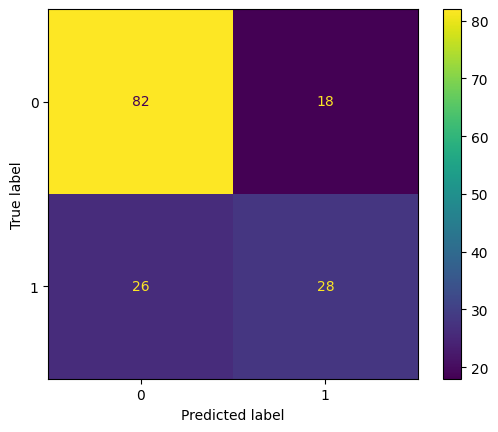

In [10]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix= confusion_matrix(y_test,y_predicted)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()

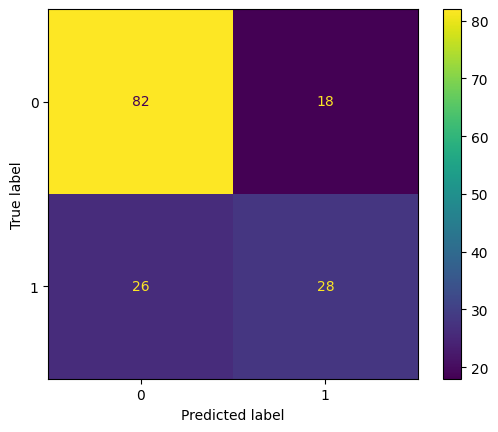

In [11]:
ConfusionMatrixDisplay.from_estimator(regression,X_test,y_test)

In [ ]:
def precision_and_recall(calc_type: str, tp:int, tn:int, fp:int, fn:int) -> float:
    """
    Docstring: This function produces precision or recall based on what is passed in.
    """
    if calc_type == "precision":
        value= tp / (tp + fp)
        #false positives are when we predict someoene
        #has a condition they dont actually have
        return value
    elif calc_type == "recall":
        value= tp / (tp + fn) 
        #false negatives are when we predict someone
        #does not hae a condition and they actually do

    return value

error_msg = "Something happened here.Check your outputs."

In [14]:
precision_and_recall("precision",27,82,18,27)

0.6

In [16]:
precision_and_recall("recall",27,82,18,27)
#Since this is a medical data set where its worse to tell someone
#they dont have a condition they actually do have, we want to
#Optimize for recall

0.5